      
<img src="https://raw.githubusercontent.com/scikit-hep/mplhep/master/docs/source/_static/mplhep.png" width="70%"/>



# mplhep

## Styling
- Easy publication grade styling
- Distribute styles/fonts
- Save real analyzer time


## Plotting
- simplify use in HEP before `mpl` catches up
- Ideally most additions would make it into `mpl`
- Can be used as in intermediary to histogramming libraries

## Histogram plotting
- `matplotlib` does not have a direct histogram plotting support
- prebinned histogram plotting is inconvenient

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
np.random.seed(2)

In [2]:
H = np.histogram(np.random.normal(2.5, .5, 100), bins=np.arange(0,6, 0.5))
print("Type:", type(H))
h, bins = H
print("Values:", h)
print("Bins:", bins)

Type: <class 'tuple'>
Values: [ 0  0  6 12 35 31 14  2  0  0  0]
Bins: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


### Simple Histograms

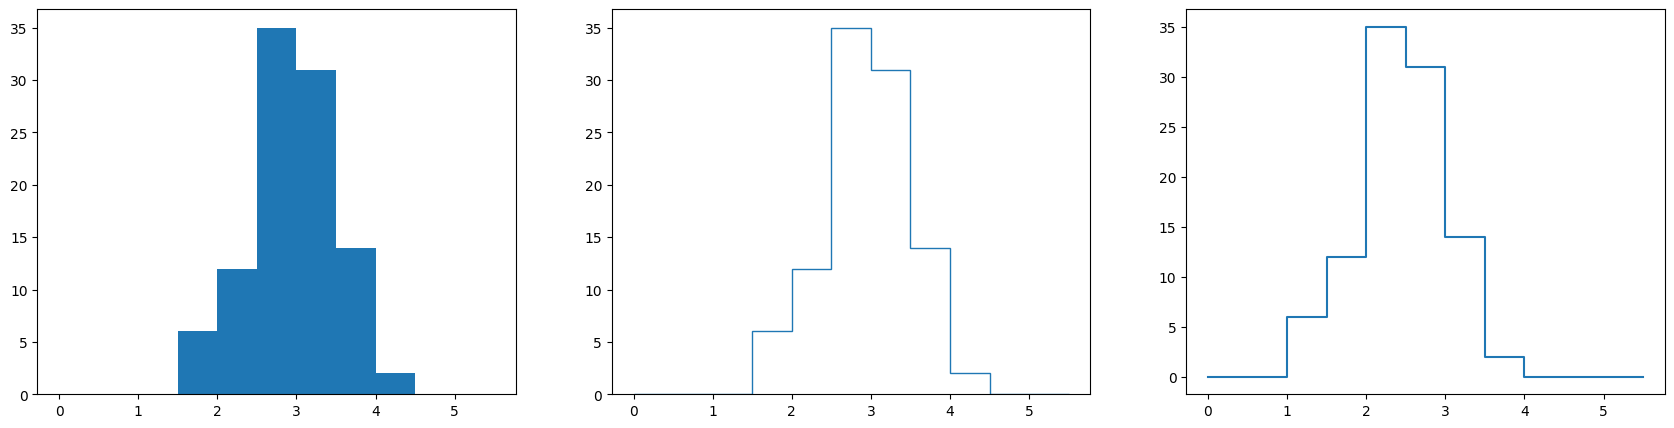

In [3]:
f, axs = plt.subplots(1,3, figsize=(21, 5))

# Filled
axs[0].hist(bins[:-1]+np.diff(bins), bins=bins, weights=h);

# Step 
axs[1].hist(bins[:-1]+np.diff(bins), bins=bins, weights=h, histtype='step');

# Different step 
axs[2].step(bins, np.r_[h, h[-1]], where='post');

### With Errorbars

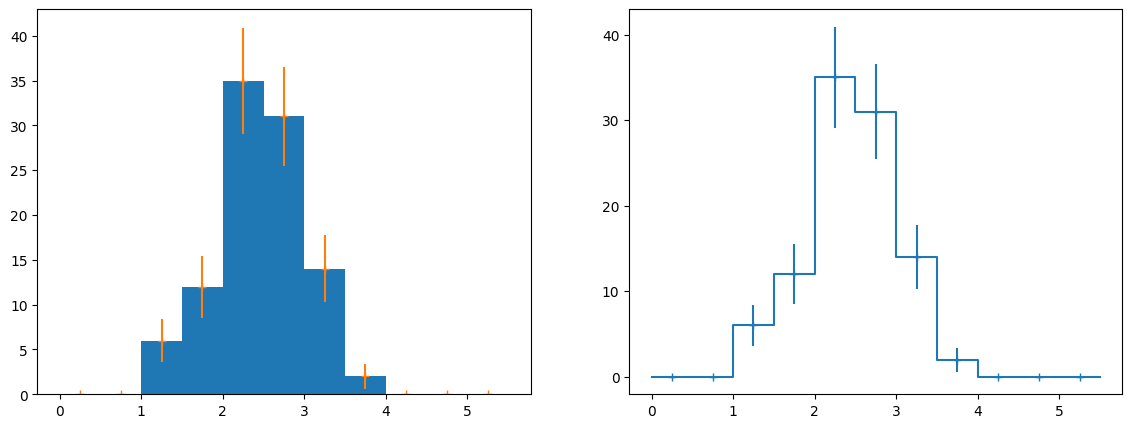

In [4]:
f, axs = plt.subplots(1,2, figsize=(14, 5))

# Filled
axs[0].hist(bins[1:]-np.diff(bins), bins=bins, weights=h);
axs[0].errorbar(bins[1:]-np.diff(bins)/2, h, yerr=np.sqrt(h), fmt='+')

# Different step 
_a = axs[1].step(bins, np.r_[h, h[-1]], where='post');
axs[1].errorbar(bins[1:]-np.diff(bins)/2, h, yerr=np.sqrt(h), fmt='+', color=_a[0].get_color());

#### But really it should be easier

/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


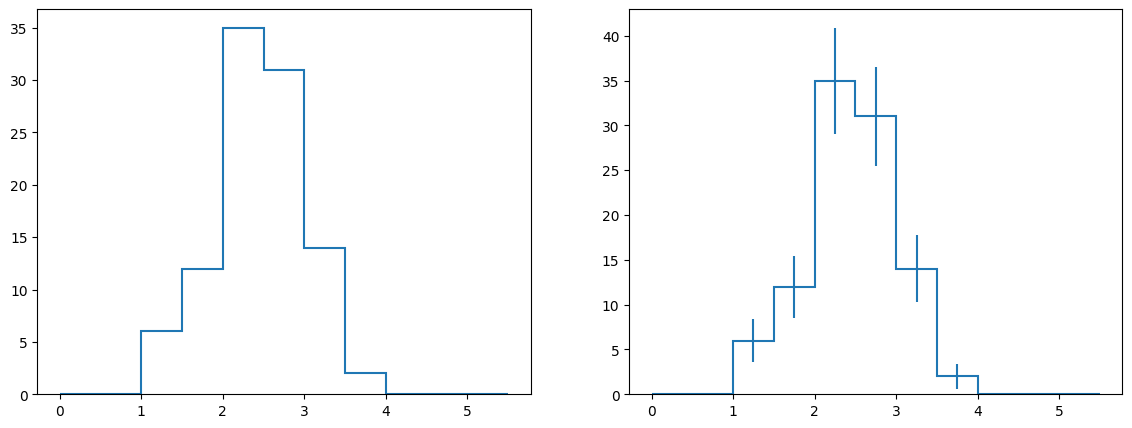

In [5]:
import mplhep as hep
f, axs = plt.subplots(1,2, figsize=(14, 5))

hep.histplot(H, ax=axs[0])
hep.histplot(h, bins, yerr=True, ax=axs[1]);

#### Primary goal is to stay unobtrusive
- if you know how `plt.hist()` works, `mplhep.histplot()` should behave like you'd expect
- painless transition back if `mpl` grows a proper histogram plotting method
- kwargs you are used to should work

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

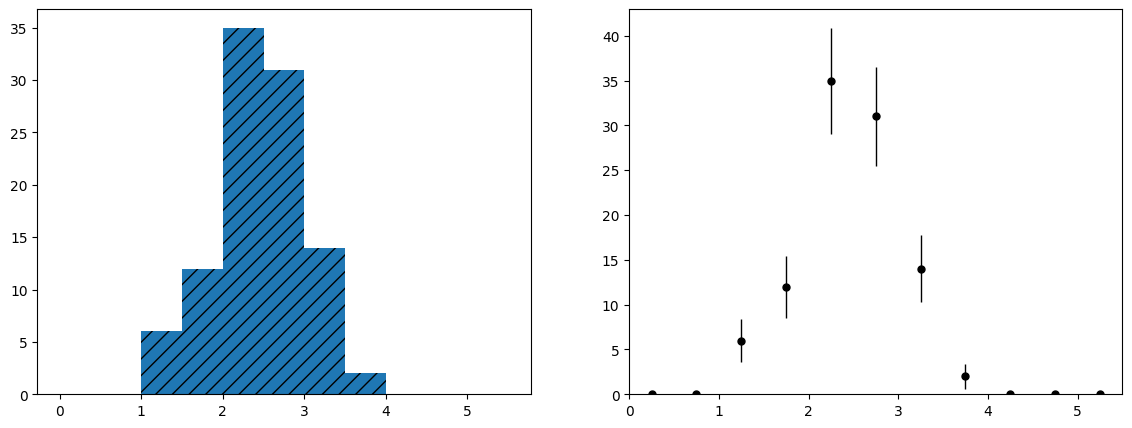

In [6]:
f, axs = plt.subplots(1,2, figsize=(14, 5))

hep.histplot(H, ax=axs[0], histtype='fill', hatch='//')
hep.histplot(H, ax=axs[1], histtype='errorbar', yerr=True, c='black')

#### Be able to do same things as `plt.hist`

/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/utils.py:240: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


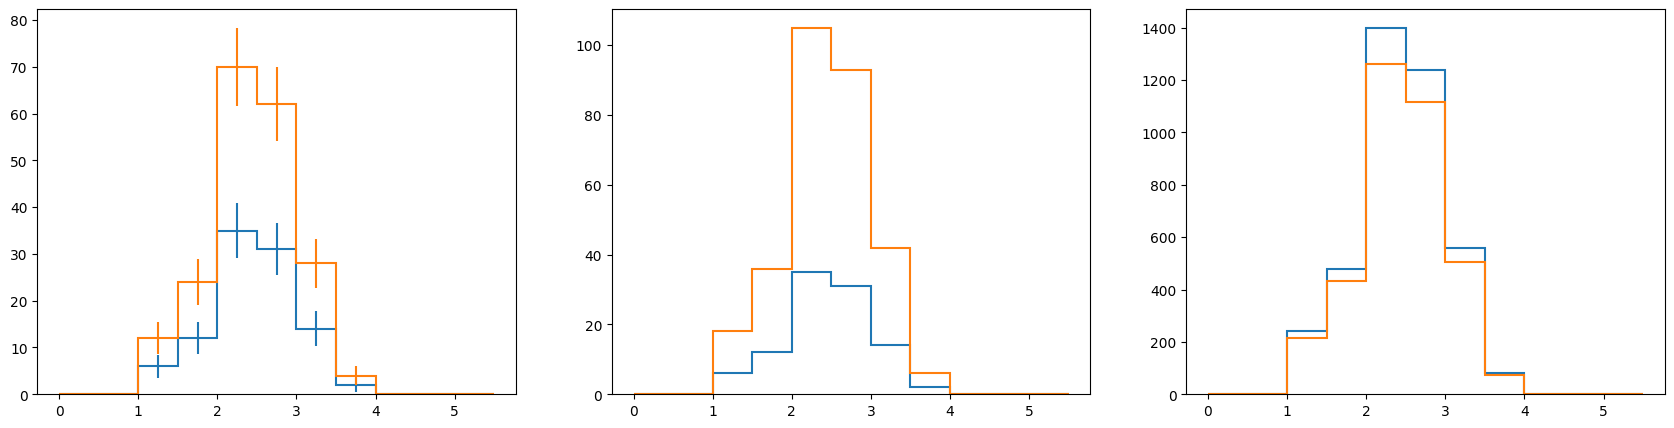

In [7]:
f, axs = plt.subplots(1,3, figsize=(21, 5))

hep.histplot([h, h*2], bins=bins, ax=axs[0], yerr=True)
hep.histplot([h, h*2], bins=bins, ax=axs[1], stack=True)
hep.histplot([h, h*2], bins=bins, ax=axs[2], binwnorm=[20, 9]);

#### Be convenient for a physicist

/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/utils.py:240: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed

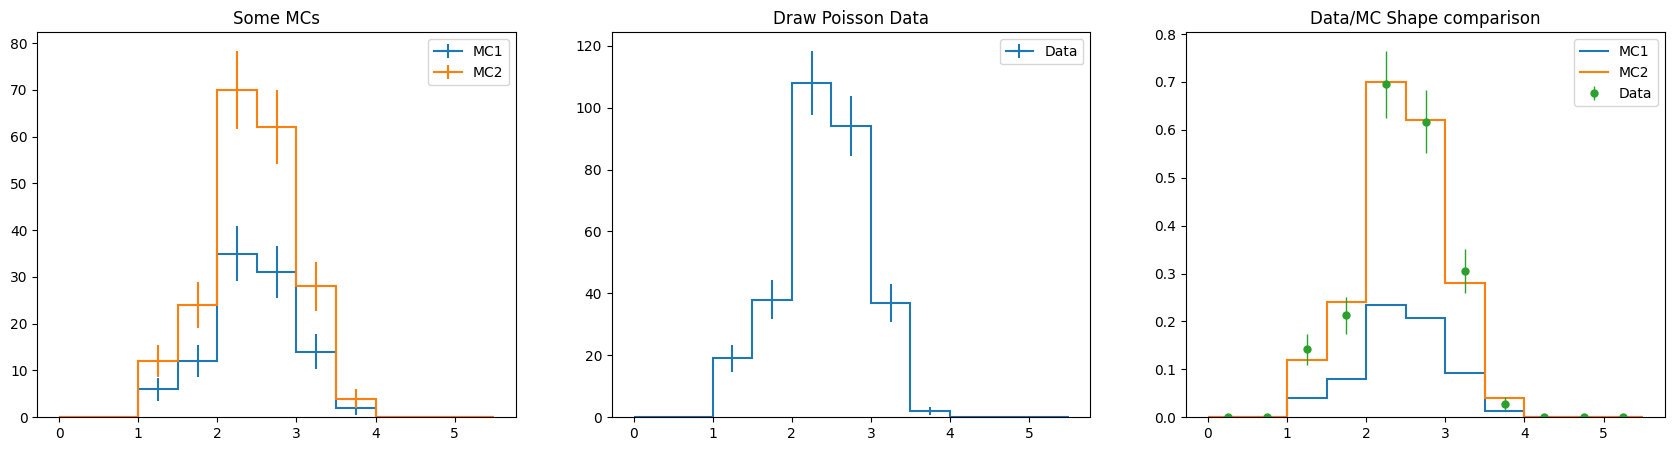

In [8]:
f, axs = plt.subplots(1,3, figsize=(21, 5))

hep.histplot([h, h*2], bins=bins, ax=axs[0], yerr=True, label=["MC1", "MC2"])
hep.histplot(np.random.poisson(h*3), bins=bins, ax=axs[1], yerr=True, label="Data")
hep.histplot([h, h*2], bins=bins, ax=axs[2], stack=True, label=["MC1", "MC2"], density=True)
hep.histplot(np.random.poisson(h*3), bins=bins, ax=axs[2], yerr=True, histtype='errorbar', label="Data", density=True)
for ax in axs:
    ax.legend()
axs[0].set_title("Some MCs")
axs[1].set_title("Draw Poisson Data")
axs[2].set_title("Data/MC Shape comparison"); 

#### Be flexible about input types

/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


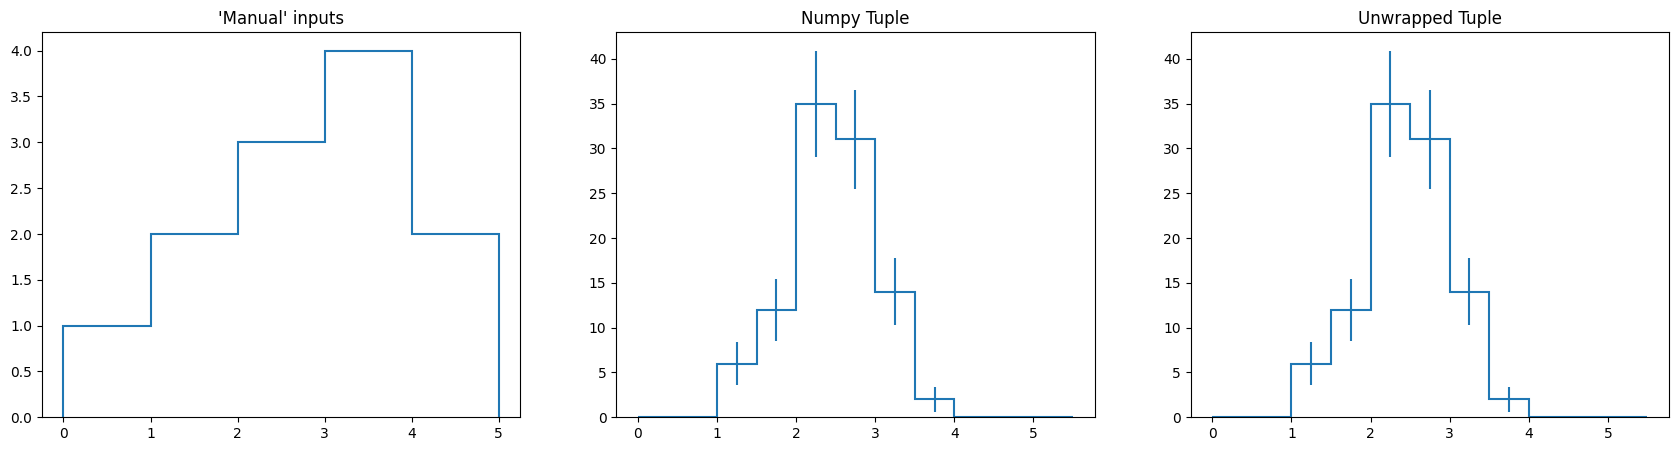

In [9]:
f, axs = plt.subplots(1,3, figsize=(21, 5))

my_hist = [1,2,3,4,2]
hep.histplot(my_hist, bins=range(len(my_hist)+1), ax=axs[0])
hep.histplot(H, yerr=True, ax=axs[1])
hep.histplot(h, bins, yerr=True, ax=axs[2])

axs[0].set_title("'Manual' inputs")
axs[1].set_title("Numpy Tuple")
axs[2].set_title("Unwrapped Tuple");

#### and interoperable for uproot and bh

In [11]:
import uproot as uproot4
from skhep_testdata import data_path
fname = data_path("uproot-hepdata-example.root")
f = uproot4.open(fname)
print(f.keys())
print(f['hpx'])
hep.histplot(f['hpx']);

ModuleNotFoundError: No module named 'skhep_testdata'

In [ ]:
import boost_histogram as bh

hist = bh.Histogram(
    bh.axis.Regular(10, 0.0, 1.0),
)
hist.fill(np.random.normal(0.5, 0.2, 1000))

hep.histplot(hist);

## 2D histograms
- minimal wrap on `plt.pcolormesh()`, which alrady has almost everything
- fix(flip) indexing
- add some annotation sugar ala `sns.heatmap`

In [ ]:
hist = bh.Histogram(
    bh.axis.Regular(10, 0.0, 1.0),
    bh.axis.Regular(10, 0, 1)
)
hist.fill(np.random.normal(0.5, 0.2, 1000), np.random.normal(0.5, 0.2, 1000))
hep.hist2dplot(hist, labels=True, cbar=False);

In [ ]:
print(f['hpxpy'])
hep.hist2dplot(f['hpxpy']);

## Styling
- Primary purpose of `mplhep` is to serve and distribute styles 
    - **ATLAS**
    - **CMS**
    - **LHCb**
- To ensure plots looks the same on any framework fonts need to be included
 - I am liable to go on a rant, so suffice to say:
 - We package an open look-alike of Helvetica called Tex Gyre Heros

(exptext: Custom Text(0.05, 0.95, 'ATLAS'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'),
 expsuffix: Custom Text(0.05, 0.95, '$\\sqrt{s} = \\mathrm{13\\ TeV}$'))

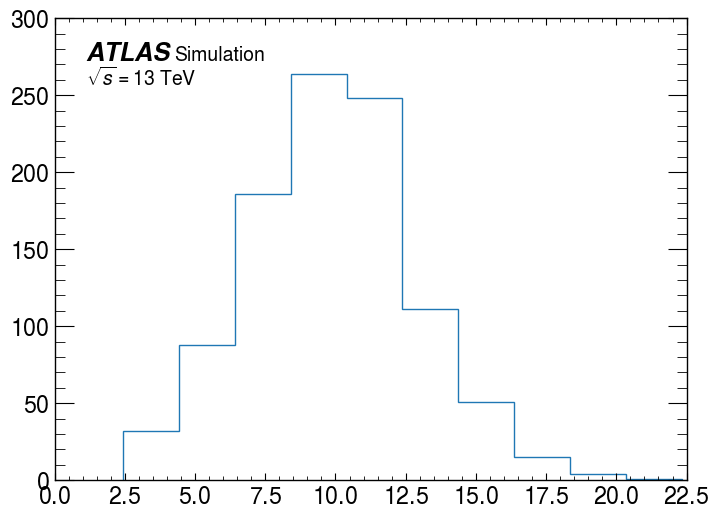

In [12]:
plt.style.use([hep.style.ATLAS])#, {'xtick.direction': 'out'}])
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)));
hep.atlas.label()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'))

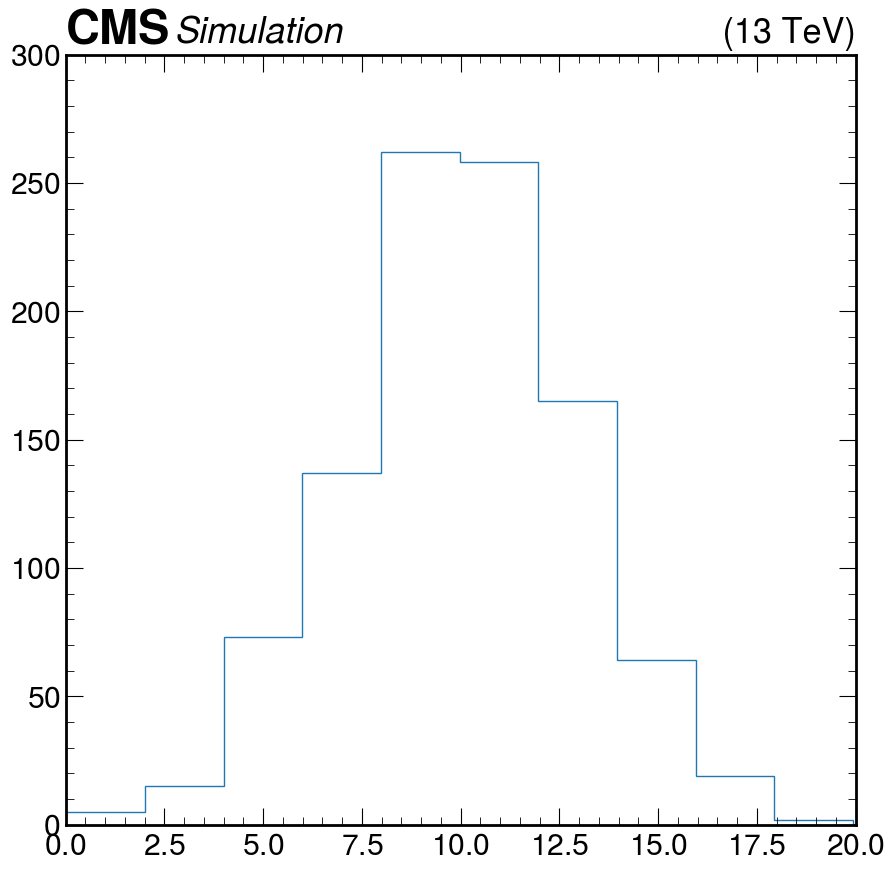

In [13]:
plt.style.use(hep.style.CMS)
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)))
hep.cms.label() 

/Users/soohwanlee/CMSANA/MuonIDMVA/.env/lib/python3.11/site-packages/mplhep/_deprecate.py:107: FutureWarning: 'LHCb' style is deprecated as it may change in the future. Please use 'LHCb1' (which is the same as currently 'LHCb') or 'LHCb2'.
  warnings.warn(self.message, category=self._warning, stacklevel=1)


(exptext: Custom Text(0.05, 0.95, 'LHCb'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'))

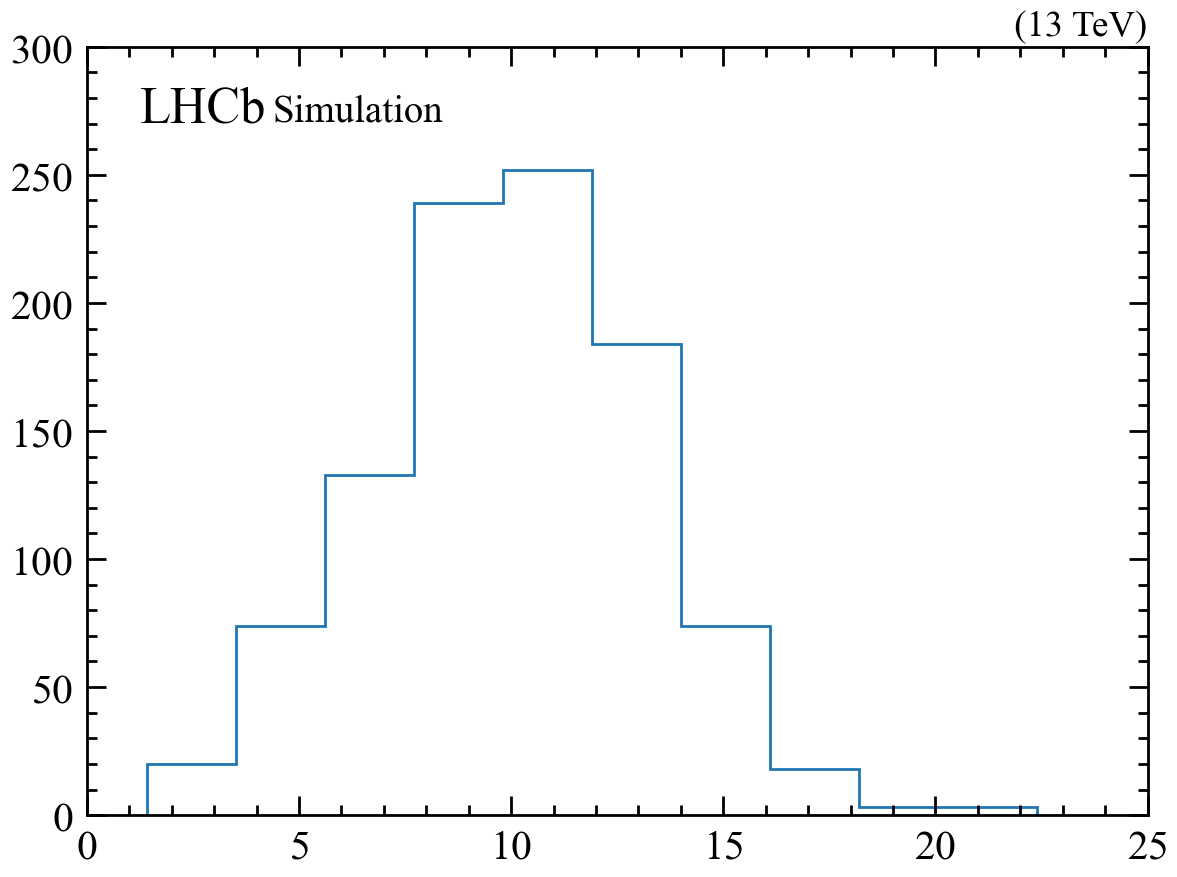

In [14]:
plt.style.use([hep.style.LHCb])
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)))
hep.lhcb.label() 

### mplhep in publications
Package has already helped produce plots in several publication
 - We can create experiment TDR guidelines compatible plots in python

- [Simultaneous Jet Energy and Mass Calibrations with Neural Networks](https://cds.cern.ch/record/2706189), ATLAS Collaboration, 2019
- [Integration and Performance of New Technologies in the CMS Simulation](https://arxiv.org/abs/2004.02327), Kevin Pedro, 2020 (Fig 3,4)
- [GeantV: Results from the prototype of concurrent vector particle transport simulation in HEP](https://arxiv.org/abs/2005.00949), Amadio et al, 2020 (Fig 25,26)
- [Search for the standard model Higgs boson decaying to charm quarks](https://cds.cern.ch/record/2682638), CMS Collaboration, 2019 (Fig 1)